<a href="https://colab.research.google.com/github/adrianbarrenada/APRENDIZAJE_AUTOMATICO_23_24/blob/main/AlgoritmoGeneticoGrupo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 4
Grupo 4

Pablo Ardila, Adrián Barreñada, Hugo López

## Introducción

Los algoritmos genéticos son una manera de resolver problemas de optimización que se basa en los modelos de selección natural para la resolución del problema.

### Descripción del algoritmo genético


1.   Representación (cromosomas): Es la manera de representar las posibles soluciones del problema.  Un cromosoma puede ser una cadena binaria, una permutación de números, o cualquier otra estructura adecuada para el problema en cuestión.
2.   Inicialización de la población: Se genera una población aleatoria de cromosomas.
3.   Evaluación (Función de aptitud): Cada cromosoma es evaluado con una función de fitness que evalua que tan buena es esta solución para el problema. En función de ello se le da un fitness que es que tan apto es el cromosoma o que tan buena es la solución en ese problema específico.
4.   Selección: Se seleccionan a los más aptos de una manera específica
  *   Selección por ruleta: Los cromosomas son seleccionados probabilísticamente, con una probabilidad proporcional a su aptitud.
  *   Selección por torneo: Se eligen varios cromosomas al azar y se selecciona el mejor de ellos.
5.   Operadores Genéticos: Se aplican estos operadores a aquellos individuos que hayan sobrevivido a la selección
  *   Cruzamiento (Crossover): Se combinan pares de cromosomas para producir nuevos cromosomas (descendencia). Esto simula la reproducción sexual. Hay varias técnicas, como el cruce de un punto, de dos puntos o uniforme.
  *   Mutación: Se alteran uno o más genes de un cromosoma de manera aleatoria. Esto introduce variabilidad en la población y ayuda a evitar óptimos locales.
6.   Reemplazo: La nueva generación reemplaza a la siguiente y se continua con la siguiente generación.

El algoritmo finzaliza cuando se le aplica una correcta condición de parada, tal como un número finito de generaciones o cuando la mejora en las soluciones es nula o insignificante.

Entre sus desventajas nos encontramos con que esto tiene un alto coste computacional y el peligro de quedarnos estancados en minimos locales o máximos locales.









## Importación de las librerías

In [ ]:
!pip install deap

In [ ]:
!pip install matplotlib

In [ ]:
!pip install numpy

In [ ]:
!pip install scipy

In [ ]:
!pip install scoop

In [ ]:
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from deap import base, creator, tools, algorithms
from scipy.optimize import minimize


## Maximización de la función "picos"


Para maximizar esta función, comenzaremos generando el fitness y los individuos. Para ello generaremos el fitness con base.Fitness que es la manera que tiene deap para evaluar la función de aptitud, seguido del peso que es un parámetro que se utiliza para evaluar la aptitud, en este caso específico 1.0 implica que se está maximizando.

In [ ]:
# Creamos los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Creamos un tipo de fitness llamado "FitnessMax" con un solo peso de 1.0
creator.create("Individual", list, fitness=creator.FitnessMax)  # Creamos un tipo de individuo que es una lista y tiene asociado el tipo de fitness "FitnessMax"


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


### Definición y representación de la función "picos"

A continuación, visto que el problema de la función es tridimensional y se puede representar, vamos a hacerlo para intuir donde puede haber mínimos y observar que nuestra función picos en este intervalo converja en la solución óptima.

Definimos la función picos

In [ ]:
def funcion_picos(x):
    """
    Función objetivo de nuestro problema
    """
    # Evaluamos si los valores de los genes están dentro de los límites, en caso contrario retornamos -1 como indicador de una solución inválida
    for i in range(len(x)):
        if x[i] > 4.5 or x[i] < -4.5:
            return -1,
    # Calculamos el valor de la función objetivo basado en los genes del individuo
    res = 3*(x[0]-1)**2*np.exp(-x[0]**2-(x[1]+1)**2) - 10*((x[0]/5)-x[0]**3-x[1]**5)*np.exp(-x[0]**2-x[1]**2) - (1/3)*np.exp(-(x[0]+1)**2-x[1]**2)
    return res,  # Retornamos el resultado como una tupla, ya que DEAP requiere que la función objetivo retorne una tupla de valores

Este código utiliza la función np.linspace para generar dos vectores, x e y, que abarcan un dominio específico. La función np.linspace crea un array de valores igualmente espaciados dentro de un intervalo especificado. En este caso, se genera un vector x que contiene 500 valores distribuidos uniformemente en el rango de -4.5 a 4.5, y un vector y con los mismos parámetros.


In [ ]:
# Generamos vectores que barran todo el dominio PARA LA FUNCION PICOS
x = np.linspace(-4.5, 4.5, 500)
y = np.linspace(-4.5, 4.5, 500)


Se genera una malla bidimensional de coordenadas utilizando los vectores `x` e `y`, luego evalúa la función funcion_picos en todos los pares de coordenadas. El resultado se almacena en una matriz `fx`, que puede representar la superficie de la función funcion_picos en el espacio definido por las variables `x` e `y`.

In [ ]:
# Evaluamos todos los valores de las variables en picos
x_ax, y_ax = np.meshgrid(x, y)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
fx = np.reshape([funcion_picos(val) for val in vals],(500, 500))

Observamos la función picos ya que en este caso al ser tridimensional se puede observar y ver claramente.

Text(0.5, 0.92, 'Representación 3D de la Funcion Picos')

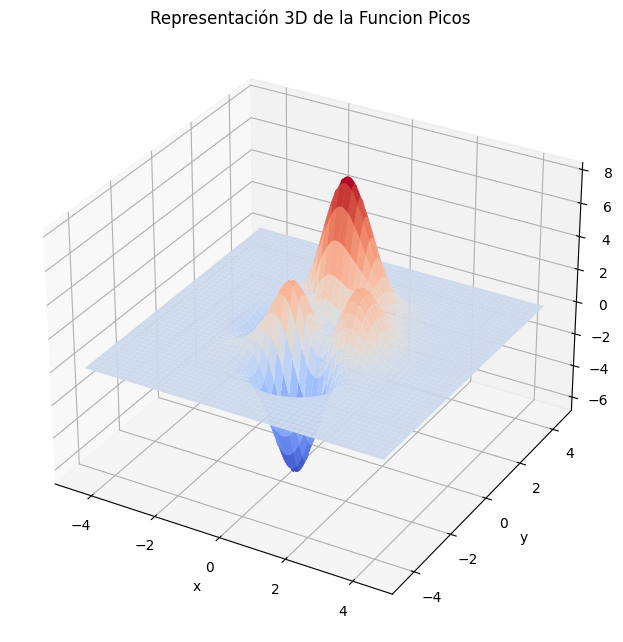

In [ ]:
# Representamos los resultados obtenidos
figure_3d = plt.figure(figsize=(8,6))
# ax = figure_3d.gca(projection="3d")
ax = figure_3d.add_axes(Axes3D(figure_3d))
ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
ax.set_title('Representación 3D de la Funcion Picos')

### Desarrollo del algoritmo genético

Comenzaremos inicializando el algoritmo. Para ello generaremos una población aleatoria entre -4.5 y 4.5 a continuación se define un individuo como una lista de dos genes generados usando attr_uniform. Finalmente, se genera una población de 256 individuos.

In [ ]:
toolbox = base.Toolbox()

# Generación de genes
toolbox.register("attr_uniform", random.uniform, -4.5, 4.5)

# Generación de inviduos y población
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 256)

El siguiente paso será definir la función de aptitud, los operadores genéticos y el proceso de selección. Cabe destacar que por ser una función con tantos máximos, buscamos promover la diversidad genética con el fin de no quedarnos estncados en ningún máximo local. Por último se aplicará la selección por torneo con un tamaño de torneo de 3.

In [ ]:
# Registro de operaciones genéticas con ajustes para aumentar la diversidad genética
toolbox.register("evaluate", funcion_picos)
toolbox.register("mate", tools.cxBlend, alpha=0.5)  # Uso del operador de cruce Blend para una mayor exploración
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=10, indpb=0.2)  # Aumento de la desviación estándar para mayor diversidad en la mutación
toolbox.register("select", tools.selTournament, tournsize=3)


Definimos la función para observar la evolución

In [ ]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """

    gen = log.select("gen")

    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_mins = np.squeeze(fit_mins)
    fit_maxs = np.squeeze(fit_maxs)

    fit_ave = log.select("avg")
    # Conseguir que las listas sean de igual tamaño reduciendo al más pequeño
    m_long = min(len(gen), len(fit_mins), len(fit_maxs), len(fit_ave))
    gen = gen[:m_long]
    fit_mins = fit_mins[:m_long]
    fit_maxs = fit_maxs[:m_long]
    fit_ave = fit_ave[:m_long]

    fig, ax1 = plt.subplots()

    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")

    ax1.fill_between(gen, fit_mins, fit_maxs, where=(fit_maxs >= fit_mins), facecolor='g', alpha=0.2)

    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-10, 160])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")

    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi=300)



Lo siguiente que se va a hacer es la función principal, donde definiremos una probabilidad de cruce, una de mutación y el número de generaciones. Además de crear el halloffame que guarda el mejor individuo para mostrarlo como solución del problema. De esta manera se realiza el algoritmo genético.

gen	nevals	avg     	std    	min     	max         
0  	256   	0.138145	1.12524	-3.98396	[6.17281877]
1  	145   	0.649353	1.8632 	-6.38252	[7.7360869] 
2  	150   	1.61603 	2.27638	-3.71833	[7.7360869] 
3  	153   	2.95915 	2.51087	-5.32792	[7.93917688]
4  	151   	4.57832 	2.68106	-5.88373	[8.08370656]
5  	141   	6.09413 	2.21066	-1.80389	[8.05530282]
6  	156   	6.65071 	2.39892	-1      	[8.0903164] 
7  	156   	7.29311 	2.03976	-6.39612	[8.10017498]
8  	167   	7.40056 	2.08462	-1      	[8.10590593]
9  	160   	7.37044 	2.29048	-1      	[8.10607603]
10 	153   	7.21901 	2.54669	-1      	[8.10607603]
Mejor fitness: 8.106076
Mejor individuo [-0.010257025524805261, 1.5841909083375512]


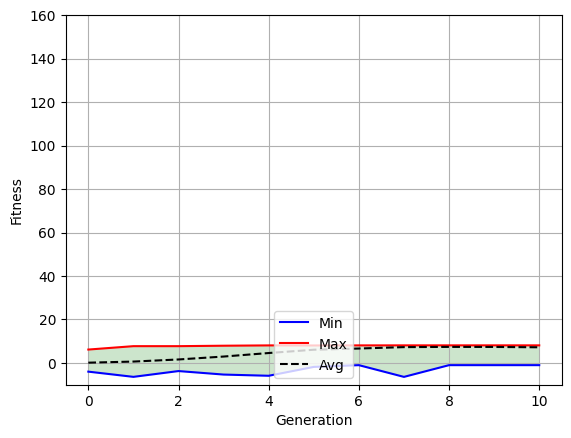

In [ ]:
def main():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.5, 0.2, 10
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max, axis=0)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

if __name__ == "__main__":
    best, log = main()
    print("Mejor fitness: %f" %best[0].fitness.values)
    print("Mejor individuo %s" %best[0])
    plot_evolucion(log)

Finalmente se observa como el algoritmo converge en  8.106211, sin embargo cuando mostramos como va mejorando el algoritmo se observa como nuestro algoritmo se estabiliza y deja de mejorar significativamente a partir de la 6 generación más o menos. Esto es positivo porque significa que a partir de ahí podemos considerar una correcta convergencia del algoritmo.

## Minimizar la función Rastringin

La función Rastrigin es una función de prueba no lineal utilizada comúnmente en optimización y algoritmos genéticos. Se caracteriza por tener un gran número de mínimos locales, lo que la convierte en un desafío ideal para evaluar la capacidad de los algoritmos de optimización para escapar de óptimos locales y encontrar el óptimo global.

### Cuál es la diferencia entre maximizar y minimizar


En el contexto de los algoritmos genéticos (AG), la diferencia entre minimizar y maximizar no solo radica en el objetivo final del problema, sino también en cómo se estructuran y evalúan las soluciones dentro del proceso evolutivo.



1.   Función de Fitness:
  *   Maximización: La función de fitness se define directamente como el valor de la función objetivo. En el caso de la función Picos 𝑓(𝑥,𝑦), la aptitud (fitness) de un individuo es el valor de 𝑧 calculado directamente como:
  FITNESS(𝑥,𝑦) = 𝑓(𝑥,𝑦)

  *   Minimización: La función de fitness se transforma para que los valores más bajos de la función objetivo correspondan a valores de fitness más altos. Esto se logra aplicando el inverso de la función objetivo:
  FITNESS(x)= 1/(f(x)+ϵ) donde epsilon es un valor pequeño que evita la división por 0.
2.   Convergencia:
    *   Maximización: La presión selectiva puede ser más intuitiva porque los individuos "más aptos" (con mayores valores de fitness) son claramente diferenciables.

    *   Minimización: En la minimización, la presión selectiva requiere una transformación adecuada de la función de fitness. Si no se maneja correctamente, la diferencia en fitness entre los individuos puede ser pequeña, lo que puede resultar en una menor presión selectiva y una convergencia más lenta. Ajustes en la función de fitness, como el inverso mencionado anteriormente, son cruciales para mantener una presión selectiva adecuada.





In [ ]:
random.seed(42)

### Definición de la función

Se comenzará mostrando la función, para ello se definirá la función Rastringin de una forma muy básica que luego se ampliará para la correcta convergencia del algoritmo, luego se generarán valores y se mostrarán gráficamente. Esto se hace con la finalidad de observar previamente la función y poder intuir cosas de cara al algoritmo genético.

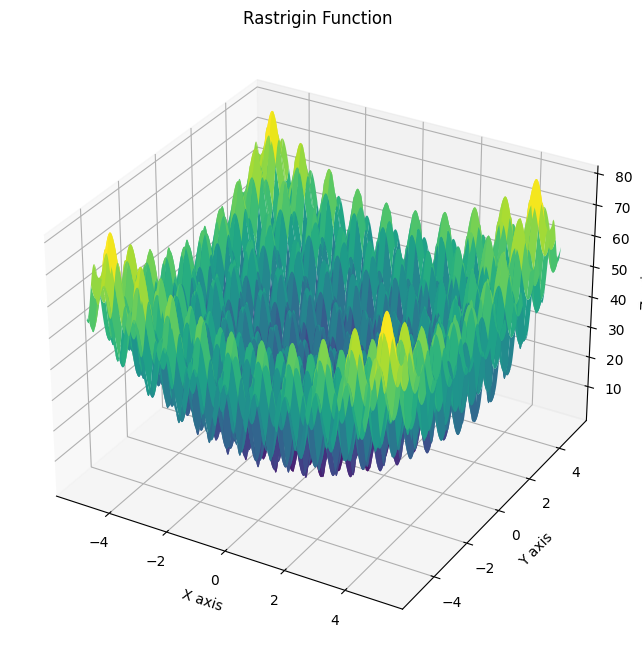

In [ ]:


# Define the Rastrigin function
def rastrigin_function(X, Y):
    Z = 10*2 + (X**2 - 10 * np.cos(2 * np.pi * X)) + (Y**2 - 10 * np.cos(2 * np.pi * Y))
    return Z

# Generate data
x = np.linspace(-5.12, 5.12, 400)
y = np.linspace(-5.12, 5.12, 400)
X, Y = np.meshgrid(x, y)
Z = rastrigin_function(X, Y)

# Create the plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_title('Rastrigin Function')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()


A diferencia de la anterior función observamos muchos más mínimos y máximos. Esto supone un problema ya que el principal riesgo de esta clase de algoritmos es el quedarse atascado en algún óptimo local. Es por ello que se buscará priorizar en este caso la fase de exploración a la de explotación ya que se observan puntos críticos por todo el dominio.

Para definir la función Rastringin se debe de saber que esta función está definida entre -5.12 y 5.12. Es por esto que se comenzará metiéndole una alta penalización de 500 cuando este valor supere el acotamiento. A continuación, para cada componente 𝑥𝑖 del vector 𝑥, se calcula el valor de cos(2𝜋𝑥𝑖). Este cálculo es crucial ya que introduce la naturaleza oscilatoria y la complejidad de la función Rastrigin, contribuyendo a la presencia de múltiples mínimos locales. Posteriormente, se calcula la suma de los cuadrados de los componentes del vector 𝑥. Este término es responsable de la forma parabólica de la función Rastrigin y asegura que los valores se alejan del óptimo global a medida que los componentes de 𝑥 se alejan del origen. Finalmente, La función Rastrigin se evalúa sumando un término constante 10𝑛 (donde 𝑛 es la dimensión del vector 𝑥) con la suma de los cuadrados de los componentes del vector y el término coseno ajustado por un factor de −10. Esta combinación crea un paisaje de optimización con múltiples picos y valles.

In [ ]:
def rastrigin_function(val):
    """
    Función objetivo de nuestro problema
    """
    for i in range(len(val)):
        if val[i] > 5.12 or val[i] < -5.12:
            return 500,

    cos = [0]*len(val)
    for i in range(len(val)):
      cos[i] = math.cos(2 * np.pi * np.array(val[i]))

    res = float(10*len(val) + sum(np.array(val)**2) - 10 * sum(np.array(cos)))
    return res,

Una vez definida la función, por ser una función tan clásica es posible que otra librería de python pueda ser capaz de hacer la minimización. Es por ello que vamos a comprobarlo.

In [ ]:
n = 10
initial_guess = np.zeros(n)  # Puedes usar cualquier valor inicial que desees
result = minimize(rastrigin_function, initial_guess, bounds=((-5.12, 5.12),) * n)
result.x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Efectivamente es posible la minimización usando la función minimize, es por ello que se asumirá el valor resultante en la variable result como el resultado teórico es decir el que se va a considerar el mínimo absoluto de la función en ese intervalo, esto es bueno ya que se podrá dar un error real.

### Desarrollo del algoritmo genético

Se comenzará aplicando la transformación necesaria para el correcto desarrollo del algoritmo genético. Para ello se hará el FitnessMin con un peso de -1. Básicamente lo que se está realizando aquí es convertir a f(x) en -f(x) de tal forma que a mayores valores de -f(x) menores serán los valores de f(x). Se usará esta transformación por el motivo de que existe la ventaja de saber que el mínimo está en 0 antes de realizar el algoritmo por lo que todos los valores serán positivos y el cambio de signo es la mejor opción.

In [ ]:
# Creamos los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Se genera la población inicial siendo cada uno un vector de dimensión 10 y estando entre -5.12 y 5.12.

In [ ]:
toolbox = base.Toolbox()
# Generación de genes
toolbox.register("attr_uniform", random.uniform, -5.12, 5.12)
# Generación de inviduos y población
# Generación de inviduos y población
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_uniform, n=10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual, n=128*10)



1.   Crossover Blend: El operador de cruce Blend (𝛼-Blend Crossover) genera nuevos individuos (descendientes) combinando los genes de dos individuos padres. Para dos individuos padres 𝑥1 y 𝑥2, y un parámetro 𝛼, el cruce produce dos descendientes 𝑦1 y 𝑦2 según:

  𝑦1𝑖 = (1−𝛼)𝑥1𝑖 +𝛼𝑥2𝑖

  ​𝑦2𝑖 = 𝛼𝑥1𝑖+(1−𝛼)𝑥2𝑖

  donde 𝑖 es el índice del gen en el vector, y 𝛼 es un valor entre 0 y 1 que determina la mezcla de los genes de los padres. En este caso,
  𝛼 = 0.5, lo que significa que cada gen de los descendientes es una mezcla equitativa de los genes de los padres.
2.   Mutación Gaussiana: La mutación introduce variaciones aleatorias en los individuos para mantener la diversidad genética. En la mutación Gaussiana, cada gen 𝑥𝑖 en un individuo tiene una probabilidad 𝑝 de ser mutado. Si un gen se selecciona para mutación, se modifica según:

  𝑥𝑖′ = 𝑥𝑖 + 𝑁(𝜇,𝜎)

  donde 𝑁(𝜇,𝜎) es una variable aleatoria con distribución normal de media
  𝜇 y desviación estándar 𝜎. En este caso, 𝜇 = 0 y 𝜎=0.1, lo que significa que la mutación añade un valor pequeño y aleatorio a cada gen con una probabilidad de 0.1 (10%).

Finalmente, se aplica una selección por torneo de 4 individuos.


In [ ]:
# Registro de operaciones genéticas
toolbox.register("evaluate", rastrigin_function)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize = 4)

Una vez definido todo llega el momento de realizar el algoritmo genético. Para este caso le aplicaremos una probabilidad de cruce de 0.9 y una probabilidad de mutación de 0.2, se realizará en 50 iteraciones.

gen	nevals	avg    	std    	min    	max           
0  	1280  	184.472	32.6866	85.6838	[304.52039103]
1  	1198  	320.696	172.918	82.7135	[500.]        
2  	1191  	274.39 	171.051	76.9062	[500.]        
3  	1166  	228.281	158.023	66.0081	[500.]        
4  	1167  	182.865	130.083	52.0848	[500.]        
5  	1161  	168.89 	124.487	52.0848	[500.]        
6  	1191  	151.298	107.946	51.399 	[500.]        
7  	1181  	131.219	79.7678	42.567 	[500.]        
8  	1170  	124.469	72.2084	33.3618	[500.]        
9  	1182  	117.786	63.7797	43.6484	[500.]        
10 	1169  	114.482	63.1972	24.9663	[500.]        
11 	1165  	113.79 	62.9745	43.8816	[500.]        
12 	1171  	106.851	49.0962	29.0156	[500.]        
13 	1172  	103.847	45.6688	30.2185	[500.]        
14 	1186  	103.94 	53.752 	29.3778	[500.]        
15 	1165  	97.5423	33.2819	29.3778	[500.]        
16 	1171  	97.119 	47.2005	35.1429	[500.]        
17 	1169  	97.4975	53.7698	21.7216	[500.]        
18 	1172  	91.4914	37.8812	23.5827	[500.]        


50 	1153  	0.427654	1.58525	0.00630949	[17.55972828] 
Mejor fitness: 0.006309
Mejor individuo [0.0005578527222103245, -0.003359119907882326, -0.00017002101824674972, 0.0011615161223346984, -0.0002195944956636354, -0.0008635312011891292, 0.0028631632269017085, 2.4214595237296568e-05, 0.0029723262249392725, -0.001002105795999918]


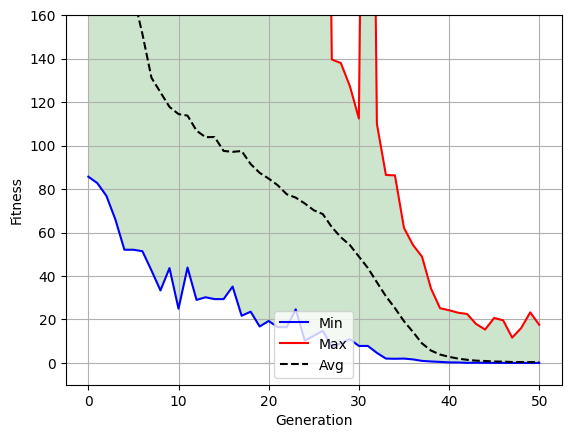

In [ ]:
# Definir el algoritmo genético
def main():

    CXPB, MUTPB, NGEN = 0.9, 0.2, 50  # Ajustar las probabilidades de cruce y mutación
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max, axis=0)
    logbook = tools.Logbook()

    # Utilizar el algoritmo eaSimple con las nuevas probabilidades de cruce y mutación
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

if __name__ == "__main__":
    best, log = main()
    print("Mejor fitness: %f" % best[0].fitness.values)
    print("Mejor individuo %s" % best[0])
    plot_evolucion(log)

Una vez visto el resultado todo apunta a que es el correcto ya que se está constantemente minimizando y parece que tiende 0. Además la gráfica muestra como el algoritmo converge. Sin embargo, se asumirá como valor teórico el que nos da python y se calculará el error.

In [ ]:
error = abs(float(best[0].fitness.values[0]) - result.fun)
print("El error en nuestro algoritmo es de : %f" % error)


El error en nuestro algoritmo es de : 0.006309


### Conclusión

Finalmente, se ha encontrado un mínimo local de la función Rastrigin con un error mínimo tras 50 generaciones. Este número de generaciones es considerablemente mayor en comparación con el problema anterior debido a la complejidad inherente de la función Rastrigin. La función Rastrigin presenta numerosos mínimos locales, principalmente debido al término cosenoidal que introduce múltiples oscilaciones en el espacio de búsqueda. Para abordar esta complejidad, se ha priorizado la fase de exploración sobre la explotación en el algoritmo genético, lo que ha resultado en la necesidad de un mayor número de iteraciones. Este enfoque asegura una cobertura más amplia del espacio de búsqueda, permitiendo al algoritmo evitar quedar atrapado prematuramente en óptimos locales y, en última instancia, converger hacia una solución de mejor calidad.